Edit distances, computed using dynamic programming, provide a quantitative measure of similarity between two sequences by counting the minimum number of operations (insertions, deletions, or substitutions) required to transform one sequence into another. This is crucial in genomic data analysis for several reasons:

- **Sequence Alignment:**  
  Algorithms like Needleman-Wunsch and Smith-Waterman, which rely on dynamic programming, use edit distances to compute optimal global or local alignments between DNA or protein sequences. These alignments are essential for identifying homologous regions, inferring evolutionary relationships, and annotating genes.

- **Error Correction:**  
  In next-generation sequencing, reads often contain errors. By computing edit distances, one can cluster similar reads or compare them against a reference genome to identify and correct sequencing errors.

- **Variant Detection:**  
  Edit distances help in comparing a sample sequence with a reference genome to identify single nucleotide polymorphisms (SNPs) and indels (insertions or deletions), which are crucial for understanding genetic variation and disease.

- **Efficient Computation:**  
  Dynamic programming provides a systematic and efficient way to solve the edit distance problem, ensuring that these computational tasks remain feasible even with the vast amounts of genomic data produced by modern sequencing technologies.

Overall, edit distances and dynamic programming form the backbone of many core computational methods in genomics, enabling robust sequence analysis, accurate alignment, and effective error detection in biological data.


In [1]:
# This implementation is very slow

def editDistRecursive(x, y):
    # This implementation is very slow
    if len(x) == 0:
        return len(y)
    elif len(y) == 0:
        return len(x)
    else:
        distHor = editDistRecursive(x[:-1], y) + 1
        distVer = editDistRecursive(x, y[:-1]) + 1
        if x[-1] == y[-1]:
            distDiag = editDistRecursive(x[:-1], y[:-1])
        else:
            distDiag = editDistRecursive(x[:-1], y[:-1]) + 1
        return min(distHor, distVer, distDiag)

In [22]:
import time
start = time.perf_counter()
x = 'shake spea'
y = 'Shakespear'
print("Edit distance:", editDistRecursive(x, y))
end = time.perf_counter()
print(f"Time taken: {(end - start):.3f} seconds")

Edit distance: 3
Time taken: 2.341 seconds


In [4]:
# This implementation is significantly faster

def editDistance(x, y):
    # Create distance matrix
    D = []
    for i in range(len(x)+1):
        D.append([0]*(len(y)+1))
    # Initialize first row and column of matrix
    for i in range(len(x)+1):
        D[i][0] = i
    for i in range(len(y)+1):
        D[0][i] = i
    # Fill in the rest of the matrix
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + 1
            distVer = D[i-1][j] + 1
            if x[i-1] == y[j-1]:
                distDiag = D[i-1][j-1]
            else:
                distDiag = D[i-1][j-1] + 1
            D[i][j] = min(distHor, distVer, distDiag)
    # Edit distance is the value in the bottom right corner of the matrix
    return D[-1][-1]

In [21]:
start = time.perf_counter()
x = 'shake spea'
y = 'Shakespear'
print("Edit distance:", editDistance(x, y))
end = time.perf_counter()
print(f"Time taken: {(end - start)*1e6:.3f} microseconds")

Edit distance: 3
Time taken: 551.917 microseconds


In [11]:
# Let me try a few different algorithms to see which is faster
def optimized_edit_distance(x, y):
    """
    Compute the edit (Levenshtein) distance between strings x and y using a space-optimized dynamic programming approach.

    This function maintains only two rows of the DP matrix at a time, as the current row depends
    only on the previous row. This reduces memory usage from O(len(x)*len(y)) to O(len(y)).

    Args:
        x (str): The first string.
        y (str): The second string.

    Returns:
        int: The edit distance between x and y.
    """
    n = len(x)
    m = len(y)
    
    # Initialize the previous row (row 0 of the matrix)
    previous = list(range(m + 1))
    
    # Iterate over each character in x
    for i in range(1, n + 1):
        # Current row starts with the cost of deleting i characters from x to match an empty y.
        current = [i] + [0] * m
        for j in range(1, m + 1):
            insertion = current[j - 1] + 1       # Cost of inserting a character into x
            deletion = previous[j] + 1             # Cost of deleting a character from x
            substitution = previous[j - 1] + (0 if x[i - 1] == y[j - 1] else 1)
            current[j] = min(insertion, deletion, substitution)
        previous = current  # Move to the next row
    
    return previous[m]


In [26]:
start = time.perf_counter()
x = 'shake spea'
y = 'Shakespear'
print("Edit distance:", optimized_edit_distance(x, y))
end = time.perf_counter()
print(f"Time taken: {(end - start)*1e6:.3f} microseconds")

Edit distance: 3
Time taken: 529.125 microseconds


Understanding global alignment in addition to simply computing edit distances is very useful in genomic data analysis for several reasons:

- **Detailed Mapping of Similarity:**  
  Global alignment not only provides a quantitative measure (like edit distance) but also produces an explicit alignment that shows exactly how two sequences correspond to each other. This detailed mapping allows researchers to see which regions are conserved and which are divergent.

- **Biologically Meaningful Comparisons:**  
  Global alignment considers the entire length of both sequences and incorporates scoring schemes (such as substitution scores and gap penalties). This often yields more biologically relevant results than a raw edit distance, as it reflects evolutionary pressures and structural constraints.

- **Facilitates Downstream Analysis:**  
  The aligned sequences can be further analyzed to identify functional domains, structural motifs, or evolutionary relationships. This is crucial for tasks like phylogenetic analysis, predicting protein function, or identifying conserved regulatory elements.

- **Foundation for Multiple Sequence Alignment:**  
  Global alignment methods are the building blocks for multiple sequence alignment algorithms. Having a good global alignment between two sequences helps in constructing reliable multiple alignments, which are essential for understanding broader patterns across species or within gene families.

In summary, while edit distances give a quick measure of how similar two sequences are, global alignment provides the context needed to interpret those differences in a biologically meaningful way.

### Interpretation Table for the Scoring Matrix

The following table represents the scoring matrix used for aligning nucleotide sequences. The rows and columns correspond to nucleotides (A, C, G, T) and a gap. The entries in the table represent the cost (or penalty) for aligning the symbol from the row with the symbol from the column.

|       | **A** | **C** | **G** | **T** | **Gap** |
|-------|:-----:|:-----:|:-----:|:-----:|:-------:|
| **A** |   0   |   4   |   2   |   4   |    8    |
| **C** |   4   |   0   |   4   |   2   |    8    |
| **G** |   2   |   4   |   0   |   4   |    8    |
| **T** |   4   |   2   |   4   |   0   |    8    |
| **Gap** |  8   |   8   |   8   |   8   |    8    |

### Explanation

- **Alphabet Definition:**  
  The nucleotide alphabet is defined as `['A', 'C', 'G', 'T']`. The table also includes a "Gap" entry used to penalize insertions or deletions.

- **Diagonal Entries (0):**  
  The diagonal elements (A-A, C-C, G-G, T-T) are all 0, indicating that matching the same nucleotide incurs no cost.

- **Mismatch Penalties (2 and 4):**  
  - For example, aligning **A** with **G** has a penalty of 2, while aligning **A** with **C** or **T** has a penalty of 4.
  - These values indicate that some mismatches are considered less severe than others, possibly reflecting biological substitution probabilities or evolutionary distances.

- **Gap Penalty (8):**  
  Aligning any nucleotide with a gap (or a gap with another gap) incurs a penalty of 8. This high penalty discourages gaps unless absolutely necessary.

Overall, this scoring matrix is used in sequence alignment algorithms to evaluate the cost of aligning two sequences. Lower scores indicate better (more similar) alignments, while higher scores indicate greater dissimilarity.


In [27]:
alphabet = ['A', 'C', 'G', 'T', '-']  # '-' represents a gap
score = [[0, 4, 2, 4, 8],
         [4, 0, 4, 2, 8],
         [2, 4, 0, 4, 8],
         [4, 2, 4, 0, 8],
         [8, 8, 8, 8, 8]]

In [28]:
# If you would like to implement a code to write the score matrix that can also be
# implemented as such

# Define the alphabet, with '-' representing a gap
alphabet = ['A', 'C', 'G', 'T', '-']
n = len(alphabet)
score = [[0 for _ in range(n)] for _ in range(n)]

# Define cost parameters:
#   - 0 for a match.
#   - 2 for a transition (A<->G or C<->T).
#   - 4 for a transversion (all other mismatches between nucleotides).
#   - 8 for any alignment with a gap.
for i in range(n):
    for j in range(n):
        # If either character is a gap, assign gap penalty.
        if i == n - 1 or j == n - 1:
            score[i][j] = 8
        elif i == j:
            score[i][j] = 0  # match
        else:
            # For nucleotide mismatches, decide based on purine/pyrimidine relationships.
            # Purines: A, G
            # Pyrimidines: C, T
            if alphabet[i] in "AG" and alphabet[j] in "AG":
                score[i][j] = 2  # transition among purines
            elif alphabet[i] in "CT" and alphabet[j] in "CT":
                score[i][j] = 2  # transition among pyrimidines
            else:
                score[i][j] = 4  # transversion

# Print the resulting score matrix
for row in score:
    print(row)


[0, 4, 2, 4, 8]
[4, 0, 4, 2, 8]
[2, 4, 0, 4, 8]
[4, 2, 4, 0, 8]
[8, 8, 8, 8, 8]


In [29]:
score

[[0, 4, 2, 4, 8],
 [4, 0, 4, 2, 8],
 [2, 4, 0, 4, 8],
 [4, 2, 4, 0, 8],
 [8, 8, 8, 8, 8]]

In [31]:
# Let is define the global alignment now

def globalAlignment(x, y):
    # Create distance matrix
    D = []
    for i in range(len(x)+1):
        D.append([0] * (len(y)+1))
        
    # Initialize first column
    for i in range(1, len(x)+1):
        D[i][0] = D[i-1][0] + score[alphabet.index(x[i-1])][-1]

    # Initialize first row
    for j in range(1,len(y)+1):
        D[0][j] = D[0][j-1] + score[-1][alphabet.index(y[j-1])]
        
    # Fill rest of the matrix
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + score[-1][alphabet.index(y[j-1])]
            distVer = D[i-1][j] + score[alphabet.index(x[i-1])][-1]
            distDiag = D[i-1][j-1] + score[alphabet.index(x[i-1])][alphabet.index(y[j-1])]
            D[i][j] = min(distHor, distVer, distDiag)
    
    return D[-1][-1]  # return value in bottom right corner


# Another implementation is given below
def optimized_global_alignment(x, y):
    """
    Compute the global alignment score (edit distance) between two sequences x and y using dynamic programming.
    
    This version precomputes letter indices and gap penalties to avoid repeated lookups in the score matrix,
    which is defined globally along with the alphabet.
    
    Args:
        x (str): The first sequence.
        y (str): The second sequence.
        
    Returns:
        int: The global alignment score from aligning x and y.
    """
    # Precompute mapping from letter to index in the alphabet
    letter_index = {letter: idx for idx, letter in enumerate(alphabet)}
    
    # Precompute indices for sequences x and y to avoid repeated lookups
    x_indices = [letter_index[ch] for ch in x]
    y_indices = [letter_index[ch] for ch in y]
    
    n = len(x)
    m = len(y)
    
    # Initialize the DP matrix with dimensions (n+1) x (m+1)
    D = [[0] * (m + 1) for _ in range(n + 1)]
    
    # Initialize first column: cost of aligning x[:i] with an empty string y.
    for i in range(1, n + 1):
        D[i][0] = D[i - 1][0] + score[x_indices[i - 1]][-1]
    
    # Initialize first row: cost of aligning an empty string x with y[:j].
    for j in range(1, m + 1):
        D[0][j] = D[0][j - 1] + score[-1][y_indices[j - 1]]
    
    # Fill in the rest of the DP matrix.
    for i in range(1, n + 1):
        xi = x_indices[i - 1]
        for j in range(1, m + 1):
            yj = y_indices[j - 1]
            # Cost if inserting a gap in x (i.e., aligning a gap with y[j-1])
            distHor = D[i][j - 1] + score[-1][yj]
            # Cost if inserting a gap in y (i.e., aligning x[i-1] with a gap)
            distVer = D[i - 1][j] + score[xi][-1]
            # Cost if aligning x[i-1] with y[j-1]
            distDiag = D[i - 1][j - 1] + score[xi][yj]
            D[i][j] = min(distHor, distVer, distDiag)
    
    # The bottom-right element of D contains the global alignment score.
    return D[n][m]


In [36]:
%%time
x = 'TATGTCATGC'
y = 'TATGGCAGC'
print(globalAlignment(x,y))

12
CPU times: user 314 µs, sys: 141 µs, total: 455 µs
Wall time: 454 µs


In [37]:
# Here we should get a speed up
%%time
x = 'TATGTCATGC'
y = 'TATGGCAGC'
print(optimized_global_alignment(x,y))

12
CPU times: user 129 µs, sys: 21 µs, total: 150 µs
Wall time: 149 µs


### Below is an example that generates two random 1000-base DNA sequences, computes their global alignment (edit) distance using a dynamic programming matrix, and then plots the resulting alignment cost matrix as a heatmap.

Global Alignment Distance: 2124


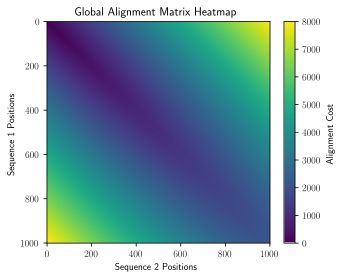

In [42]:
import random
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib
matplotlib.pyplot.rc('text', usetex=True)
import numpy as np

random.seed(123)
# Define the alphabet (including a gap symbol)
alphabet = ['A', 'C', 'G', 'T', '-']

# Define the substitution score matrix:
# For nucleotides: 0 for a match, 2 or 4 for mismatches, and 8 for any gap alignment.
score = [
    [0, 4, 2, 4, 8],
    [4, 0, 4, 2, 8],
    [2, 4, 0, 4, 8],
    [4, 2, 4, 0, 8],
    [8, 8, 8, 8, 8]
]

def random_sequence(length):
    """Generate a random DNA sequence of given length."""
    return ''.join(random.choice('ACGT') for _ in range(length))

# Create two random sequences of length 1000
seq1 = random_sequence(1000)
seq2 = random_sequence(1000)

def global_alignment_matrix(x, y):
    """
    Compute the global alignment (edit) distance matrix for sequences x and y.
    
    This function builds the full DP matrix using the provided score matrix.
    The gap penalty is defined by aligning any nucleotide with '-' (last row/column).
    
    Args:
        x (str): The first sequence.
        y (str): The second sequence.
        
    Returns:
        list: The full DP matrix (list of lists) where D[i][j] is the cost of aligning
              x[:i] with y[:j].
    """
    n = len(x)
    m = len(y)
    
    # Create DP matrix with dimensions (n+1)x(m+1)
    D = [[0] * (m + 1) for _ in range(n + 1)]
    
    # Precompute mapping from nucleotide to index in the score matrix.
    letter_index = {letter: idx for idx, letter in enumerate(alphabet)}
    
    # Initialize first column (x aligned with an empty string y)
    for i in range(1, n + 1):
        D[i][0] = D[i-1][0] + score[letter_index[x[i-1]]][-1]
    
    # Initialize first row (y aligned with an empty string x)
    for j in range(1, m + 1):
        D[0][j] = D[0][j-1] + score[-1][letter_index[y[j-1]]]
    
    # Fill in the rest of the DP matrix
    for i in range(1, n + 1):
        xi = letter_index[x[i-1]]
        for j in range(1, m + 1):
            yj = letter_index[y[j-1]]
            # Cost of aligning x[i-1] with y[j-1]
            distDiag = D[i-1][j-1] + score[xi][yj]
            # Cost of aligning x[i-1] with a gap
            distVer  = D[i-1][j] + score[xi][-1]
            # Cost of aligning y[j-1] with a gap
            distHor  = D[i][j-1] + score[-1][yj]
            D[i][j] = min(distDiag, distVer, distHor)
    
    return D

# Compute the global alignment matrix for the two sequences
D = global_alignment_matrix(seq1, seq2)
alignment_distance = D[-1][-1]
print("Global Alignment Distance:", alignment_distance)

# Convert the DP matrix to a NumPy array for plotting
D_np = np.array(D)

# Plot the alignment matrix as a heatmap
plt.figure(figsize=(5, 4))
plt.imshow(D_np, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar(label='Alignment Cost')
plt.xlabel('Sequence 2 Positions')
plt.ylabel('Sequence 1 Positions')
plt.title('Global Alignment Matrix Heatmap')
plt.show()

In [43]:
seq1

'AGATGAATGGACCGGCCATATAAGTAAACCAGTTGTAGGTCGATTTTGACATGCGGTATTGACAGAGCTAGTCTCCTTTAACTCAGGGTTAAAGAATATATAGGTAGTGACTACGCAATGCGTGCGACTTACTAGTTGTACGCGAGCGAGCCGGTAACCACGCAGAGCCTTTAGTGTCCATGAAGTGTGGCTGCCTATTGCTGAGAGGATATGATGCTGTGCTGGACAATTCTATCGGCATGAGTCAGGCTGTAATCCAGCCGTTCGAATGCATTTAATTGCTCCCCACCATAATGAACTGCGAGGCAGCTCTCTTCTATAGCTACATGATGGGCTAAAGACTCTCTCACAGAACCTTCTAACATACAGTCCCTGCAAGGTGCAAAACGCCAGTGGCTAGGGAGAGATCGTACTACCGTTGCTAGACCGCACAGAAGAGGCGTAGAAGGGTCAAAATTGCCTATCCATCACGTCTGAAATGACGGGACGGCTCTATACCACATCTTGACATAGACACAATTTGCTTAAACCCGGTGGTCAACATCTAGGTGGGCCAGAATGTCAACTCATCTGGTGGTCCAACGACCCTCCCTATCGGTCATTTGATTAGTTAAAGGGCTGCACCTCTTAGCGGGAGCAACATTTTACCGCGTTATAGTACGAAGCCAATTTTATAAGTTGGGAGCAATTGACGGGCGTGCATCCGCTCGCCTTGTTTGTGATTAGTCCACTTGCGCCTATAGTCCGCCGTCCTGCCGCAGCTACCGCGAACAGCACTTCAACATCCGCTCGTATGTTCCCCGTCCCCCTAAGCATTCCTAGGGGCCCCAATGTACTGATGATACGGCTTGATTGGACGGGAAAGGTTTCCCCGCTCCTGTCGGTTACTCCCGTGATGTACAGCGCTCCCCCGTTATTGGCACTGAGCTGTTAACCTTCATAGCCCAAATTGCGTCCCACGGTGCTGCCCAGCGATAAGATGACCGTCTGCGGTGTGGC

In [44]:
seq2

'TACCTAGTTCCGACCCCGCTCTTCAACCCATGGCTTAGTCTCGCGACTGTAATAATACACGCGCCCTAAACTGCCTTCATATAGACTCCCCCCAGGACCAGGGACGAAGATCGGTCTTAAAAATTCACGCCCGGATAAGAGTTGACTCGGTGCCCTGAATCTTCTGGGAATCCTTCTAGCCAAGGCGTGACATGTAGCGTCTACCCGCGCGATGCTTCAGACTTCGGGACTCAAGGCTACTCACACCAAACTTGCTTAAGCTGACCCGCTATCGTTGCACTGACGACGTTATTCCTATGACCACCCGTGCAAGGTAAGTTGGTTTCCATAGCAATCACGGGCGCTAGGGTAAAGAGACATACGGGTGCCCTTCACGTTAGGACTCGGGGGAACGGCGCTGCGTGTGTTAATCGTAGGAACTGCGACGATATATCCACCCAACACGACTTGCGACTCAGAAAAGCTTTAACACATCCAGATTTTGACTTCATGCTGGCGAATATGGGTAGACTTTTGGGTCTGTAGGCCACGTATCTGAATAGATCGCGCACAGGCTTGCAGGCTGAAACTACCTAGTAGAACCGGGGGTTGAATGACGTCGGTCCCGGCTTGGGGCAGACTACAACCCTCACAACCATCCTCAATGCATTGGAAAGTGATGTAGGCTGGCATACTATTCTTGTGGGGGGGTCCACGATGAGGAGCGGATGAGCTAATAGCCCGTAGAATGTATCGCGAGTTCGCAGGGGCGACTAGCATATACTTAACGGTACTTTTCTGTTATTGCCTTTGATGTAGTAGAAAAGCCACACTATGAAGTCAACAGCAGACGAGTAACGTTTCAGACCGACATTTCTGGTGCTCTGTGGATGGGTCCATACCCTGCTGGTGCTGTAGACCACCCTATATGCGAGGCGATGGGCTAGCCGAATTGCCCTAACTTGACTAGCGTCTCCGAAGAATGAAACTCTGCGAGGACGATCGCATGCCCTAGATATA

### Below is a Python code snippet that computes and plots a position-by-position misalignment between two sequences. In this example, we assume that the sequences are of equal length (or you can take the minimum length), and we plot a value of 1 at positions where the nucleotides differ (mismatch) and 0 where they match.

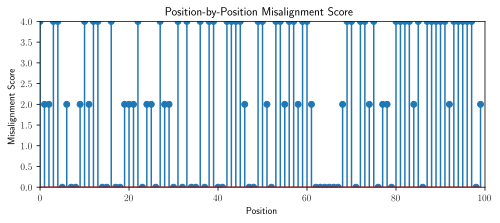

In [54]:
# Define the alphabet and score matrix (assuming no gaps in these sequences)
alphabet = ['A', 'C', 'G', 'T']
score = [
    [0, 4, 2, 4, 8],
    [4, 0, 4, 2, 8],
    [2, 4, 0, 4, 8],
    [4, 2, 4, 0, 8],
    [8, 8, 8, 8, 8]
]

def misalignment_scores(seq1, seq2):
    """
    Compute misalignment scores for each position between two sequences
    using the provided substitution score matrix.
    
    Args:
        seq1 (str): The first DNA sequence.
        seq2 (str): The second DNA sequence.
        
    Returns:
        list: A list of scores for each position where the sequences are compared.
    """
    # Compare over the minimum length of the two sequences
    length = min(len(seq1), len(seq2))
    scores = []
    for i in range(length):
        base1 = seq1[i]
        base2 = seq2[i]
        if base1 == base2:
            # No penalty for match
            scores.append(0)
        else:
            # Lookup score: indices for base1 and base2
            idx1 = alphabet.index(base1)
            idx2 = alphabet.index(base2)
            scores.append(score[idx1][idx2])
    return scores

def plot_misalignment_scores(seq1, seq2):
    """
    Plot the misalignment scores between two sequences.
    
    Args:
        seq1 (str): The first DNA sequence.
        seq2 (str): The second DNA sequence.
    """
    scores = misalignment_scores(seq1, seq2)
    positions = list(range(len(scores)))
    
    plt.figure(figsize=(8, 3))
    plt.stem(positions, scores)
    plt.xlabel("Position")
    plt.ylabel("Misalignment Score")
    plt.title("Position-by-Position Misalignment Score")
    plt.ylim(0, max(scores))
    plt.xlim(0, 100)
    plt.grid(False)
    plt.show()

# Example usage:
# For demonstration, let's generate two random sequences of length 100
import random
random.seed(123)
def random_sequence(length):
    return ''.join(random.choice(alphabet) for _ in range(length))

seq1 = random_sequence(100)
seq2 = random_sequence(100)

plot_misalignment_scores(seq1, seq2)


## Finding overlap between two strings

Understanding the overlap between two strings is extremely useful in genomic data science for several reasons:

- **Sequence Assembly:**  
  Overlap information is critical in de novo assembly methods (like overlap-layout-consensus approaches). By identifying regions where sequencing reads overlap, algorithms can accurately piece together short fragments into longer contiguous sequences (contigs) and eventually complete genomes.

- **Error Correction:**  
  Overlap analysis helps identify redundant information among reads. When multiple reads share a large overlap, discrepancies can be resolved by consensus, thereby improving the accuracy of the assembled sequence.

- **Variant Detection:**  
  Overlapping reads can be used to compare sequences and detect variations (such as single nucleotide polymorphisms or indels) by analyzing differences within the overlapping regions, leading to more reliable variant calling.

- **Efficient Alignment:**  
  Overlap-based methods can reduce computational complexity by focusing on regions where sequences are likely to align. This is particularly useful when aligning large genomic datasets.

- **Haplotype Phasing:**  
  Overlap information helps in phasing haplotypes by connecting variants present on the same read or overlapping reads, thereby enabling the reconstruction of individual haplotype sequences.

In summary, understanding overlaps is fundamental for accurately assembling genomes, correcting sequencing errors, detecting genetic variants, and ultimately gaining insights into genomic structure and function.


In [71]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match


def optimized_overlap(a, b, min_length=3):
    """
    Return the length of the longest suffix of 'a' that matches a prefix of 'b'
    that is at least 'min_length' characters long. If no such overlap exists,
    return 0.

    This implementation checks for overlaps starting from the maximum possible
    overlap and iterates downwards until it finds a match.
    
    Args:
        a (str): The first string.
        b (str): The second string.
        min_length (int): The minimum acceptable overlap length.
        
    Returns:
        int: The length of the longest valid overlap, or 0 if none exists.
    """
    max_overlap = min(len(a), len(b))
    for L in range(max_overlap, min_length - 1, -1):
        if a[-L:] == b[:L]:
            return L
    return 0


In [75]:
%%time
x = 'TTACGT'
y = 'CGTGTGC'
overlap(x,y)

CPU times: user 31 µs, sys: 61 µs, total: 92 µs
Wall time: 102 µs


3

In [76]:
%%time
x = 'TTACGT'
y = 'CGTGTGC'
optimized_overlap(x,y)

CPU times: user 26 µs, sys: 1e+03 ns, total: 27 µs
Wall time: 31 µs


3

### Create a Naive Overlap Map now

In [78]:
from itertools import permutations

def naive_overlap_map(reads, k):
    olaps = {}
    for a, b in permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > 0:
            olaps[(a, b)] = olen
    return olaps


def optimized_naive_overlap_map(reads, k):
    """
    Build an overlap map for each ordered pair of reads, returning a dictionary
    that maps a tuple (a, b) to the length of the overlap between a and b, if the
    overlap is at least k characters long.

    Args:
        reads (list): A list of read strings.
        k (int): The minimum required overlap length.

    Returns:
        dict: A dictionary with keys as tuples (a, b) and values as the overlap length.
    """
    ovlp = overlap  # cache the overlap function locally
    return {
        (a, b): olen 
        for a, b in permutations(reads, 2)
        if (olen := ovlp(a, b, min_length=k)) > 0
    }


In [80]:
%%time
reads = ['ACGGATC', 'GATCAAGT', 'TTCACGGA']
print(naive_overlap_map(reads, 3))

{('ACGGATC', 'GATCAAGT'): 4, ('TTCACGGA', 'ACGGATC'): 5}
CPU times: user 188 µs, sys: 200 µs, total: 388 µs
Wall time: 393 µs


In [81]:
%%time
reads = ['ACGGATC', 'GATCAAGT', 'TTCACGGA']
print(optimized_naive_overlap_map(reads, 3))

{('ACGGATC', 'GATCAAGT'): 4, ('TTCACGGA', 'ACGGATC'): 5}
CPU times: user 86 µs, sys: 28 µs, total: 114 µs
Wall time: 123 µs


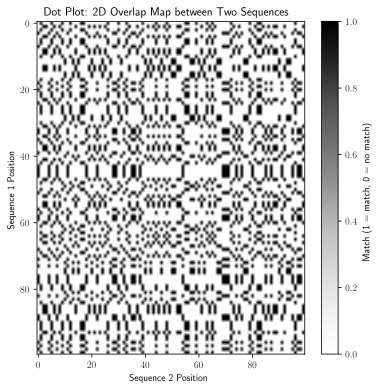

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import random

def random_seq(length):
    """Generate a random DNA sequence of given length."""
    return ''.join(random.choice("ACGT") for _ in range(length))

def dot_plot(seq1, seq2):
    """
    Create a 2D overlap map (dot plot) for two sequences.
    
    The function returns a binary matrix M of size (len(seq1), len(seq2))
    where M[i, j] = 1 if seq1[i] == seq2[j] and 0 otherwise.
    
    Args:
        seq1 (str): The first DNA sequence.
        seq2 (str): The second DNA sequence.
        
    Returns:
        np.ndarray: A binary matrix representing the dot plot.
    """
    n1, n2 = len(seq1), len(seq2)
    # Initialize an empty matrix
    matrix = np.zeros((n1, n2), dtype=int)
    # Fill the matrix where the characters match
    for i in range(n1):
        for j in range(n2):
            if seq1[i] == seq2[j]:
                matrix[i, j] = 1
    return matrix

# Generate two random sequences of length 100
random.seed(123)
seq1 = random_seq(100)
seq2 = random_seq(100)

# Create the dot plot matrix
overlap_matrix = dot_plot(seq1, seq2)

# Plot the 2D overlap map as a heatmap (dot plot)
plt.figure(figsize=(6, 6))
plt.imshow(overlap_matrix, cmap='Greys', interpolation='none', aspect='auto')
plt.xlabel("Sequence 2 Position")
plt.ylabel("Sequence 1 Position")
plt.title("Dot Plot: 2D Overlap Map between Two Sequences")
plt.colorbar(label='Match (1 = match, 0 = no match)')
plt.show()